In [11]:
import pandas as pd
from sktime.transformations.series.summarize import WindowSummarizer
from sktime.datasets import load_airline, load_longley
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import ForecastingPipeline
from sktime.split import temporal_train_test_split

print("=" * 80)
print("EXAMPLE 1: Basic WindowSummarizer on Airline Dataset (y only)")
print("=" * 80)

# Load airline data
y = load_airline()
print("\n1. Original y data:")
print(f"Shape: {y.shape}")
print(f"Type: {type(y)}")
print(f"Index type: {type(y.index)}")
print(y.head(10))

# Define transformation parameters
kwargs = {
    "lag_feature": {
        "lag": [1],                    # lag-1 values
        "mean": [[1, 3], [3, 6]],     # mean over windows [1,3] and [3,6]
        "std": [[1, 4]],              # std over window [1,4]
    }
}

print(f"\n2. WindowSummarizer parameters:")
print(f"lag: {kwargs['lag_feature']['lag']}")
print(f"mean windows: {kwargs['lag_feature']['mean']}")
print(f"std windows: {kwargs['lag_feature']['std']}")

# Apply transformation
transformer = WindowSummarizer(**kwargs)
y_transformed = transformer.fit_transform(y)

print(f"\n3. Transformed y data:")
print(f"Shape: {y_transformed.shape}")
print(f"Columns: {y_transformed.columns.tolist()}")
print(y_transformed.head(10))

EXAMPLE 1: Basic WindowSummarizer on Airline Dataset (y only)

1. Original y data:
Shape: (144,)
Type: <class 'pandas.core.series.Series'>
Index type: <class 'pandas.core.indexes.period.PeriodIndex'>
Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
1949-06    135.0
1949-07    148.0
1949-08    148.0
1949-09    136.0
1949-10    119.0
Freq: M, Name: Number of airline passengers, dtype: float64

2. WindowSummarizer parameters:
lag: [1]
mean windows: [[1, 3], [3, 6]]
std windows: [[1, 4]]

3. Transformed y data:
Shape: (144, 4)
Columns: ['Number of airline passengers_lag_1', 'Number of airline passengers_mean_1_3', 'Number of airline passengers_mean_3_6', 'Number of airline passengers_std_1_4']
         Number of airline passengers_lag_1  \
Period                                        
1949-01                                 NaN   
1949-02                               112.0   
1949-03                               118.0   
1949-04                

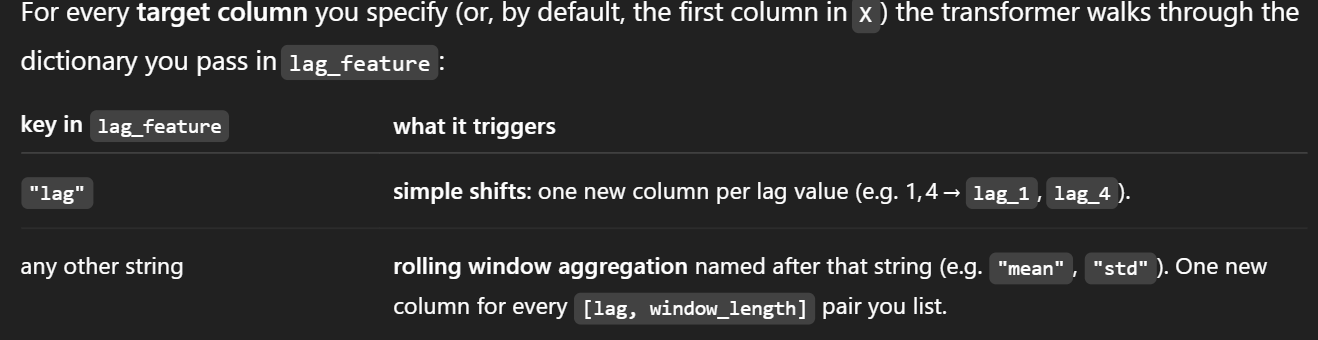

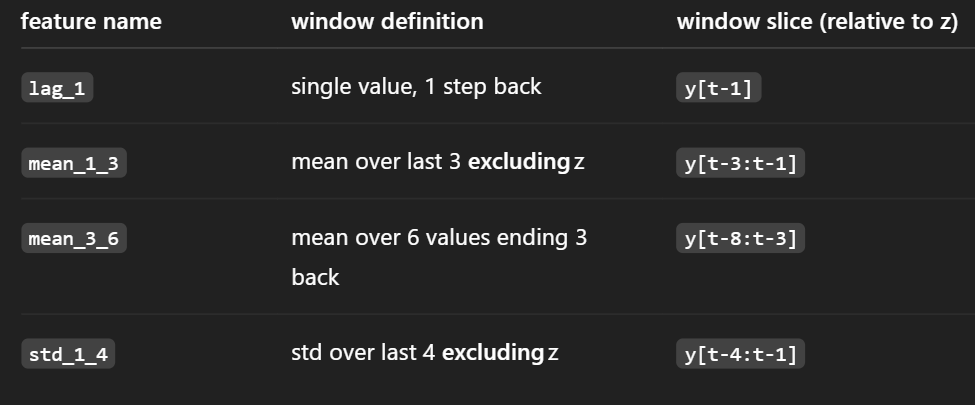